In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U sentence-transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 72.4 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=27e320b22b26c1ecc35a7dfecb238a10ab55dd25679ca9e838177b053b56f162
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets

from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score
import pickle

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# embeddings_balanced_b_path = 'drive/MyDrive/ThesisData/wordEmbedding/binary/balanced/em_2.csv'
# embeddings_balanced_b_path_im = 'drive/MyDrive/ThesisData/wordEmbedding/binary/imbalanced/em_2.csv'

embeddings_balanced_b_path = 'drive/MyDrive/ThesisData/augmented_data/wordEmbedding/binary/balanced/em_2.csv'
embeddings_balanced_b_path_im = 'drive/MyDrive/ThesisData/augmented_data/wordEmbedding/binary/imbalanced/em_2.csv'

In [ ]:
plt_data_balanced = []
plt_data_imbalanced = []
plt_ROC_balanced = []
plt_ROC_imbalanced = []

In [ ]:
import sys
import numpy as np

def predictive_entropy(predictions):
    epsilon = sys.float_info.min
    predictive_entropy = -np.sum( np.mean(predictions, axis=0) * np.log(np.mean(predictions, axis=0) + epsilon),
            axis=-1)

    return predictive_entropy

#Balanced Dataset

#UNI - Directional


Adam

dataset_b.shape: 15800 768
Iteration: 1000. Loss: 0.4313375949859619. Accuracy: 74.58861% F1: 73.75% cohen_kappa: 0.4915
Iteration: 2000. Loss: 0.42542529106140137. Accuracy: 76.36076% F1: 76.46% cohen_kappa: 0.5273
Iteration: 3000. Loss: 0.5501827597618103. Accuracy: 78.29114% F1: 79.07% cohen_kappa: 0.5661
Iteration: 4000. Loss: 0.5631757378578186. Accuracy: 79.49367% F1: 80.77% cohen_kappa: 0.5903
Iteration: 5000. Loss: 0.5046682953834534. Accuracy: 80.44304% F1: 81.22% cohen_kappa: 0.6092
Iteration: 6000. Loss: 0.3719179034233093. Accuracy: 79.30380% F1: 81.70% cohen_kappa: 0.5870
Iteration: 7000. Loss: 0.6287826895713806. Accuracy: 81.45570% F1: 82.69% cohen_kappa: 0.6296
Iteration: 8000. Loss: 0.330935537815094. Accuracy: 84.05063% F1: 84.06% cohen_kappa: 0.6810
Uncertainity: 0.69306576


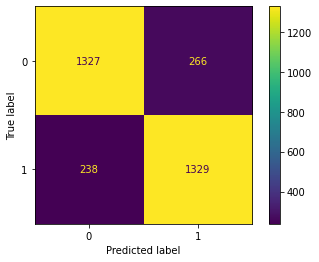

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_UNI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM

        # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional
        self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits

'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs


            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_balanced.append(('LSTM-UNI',iter,'Adam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-UNI','Adam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 15800 768
Iteration: 1000. Loss: 0.5494216084480286. Accuracy: 75.82278% F1: 76.29% cohen_kappa: 0.5166
Iteration: 2000. Loss: 0.43707385659217834. Accuracy: 75.88608% F1: 75.24% cohen_kappa: 0.5175
Iteration: 3000. Loss: 0.4137023985385895. Accuracy: 77.87975% F1: 78.99% cohen_kappa: 0.5580
Iteration: 4000. Loss: 0.6053870916366577. Accuracy: 78.35443% F1: 80.71% cohen_kappa: 0.5680
Iteration: 5000. Loss: 0.34879270195961. Accuracy: 81.10759% F1: 81.43% cohen_kappa: 0.6223
Iteration: 6000. Loss: 0.4244247376918793. Accuracy: 80.85443% F1: 81.74% cohen_kappa: 0.6174
Iteration: 7000. Loss: 0.3135165870189667. Accuracy: 83.54430% F1: 84.07% cohen_kappa: 0.6711
Iteration: 8000. Loss: 0.4064722955226898. Accuracy: 82.84810% F1: 83.66% cohen_kappa: 0.6573
Uncertainity: 0.6879471


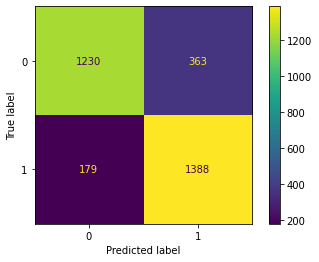

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_UNI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM

        # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional
        self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits

'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_balanced.append(('LSTM-UNI',iter,'NAdam',loss.item()))


pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-UNI','NAdam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15800 768
Iteration: 1000. Loss: 0.637201189994812. Accuracy: 74.39873% F1: 73.41% cohen_kappa: 0.4877
Iteration: 2000. Loss: 0.6090019941329956. Accuracy: 73.19620% F1: 68.52% cohen_kappa: 0.4626
Iteration: 3000. Loss: 0.5717118978500366. Accuracy: 75.82278% F1: 76.48% cohen_kappa: 0.5167
Iteration: 4000. Loss: 0.4172702729701996. Accuracy: 76.96203% F1: 79.19% cohen_kappa: 0.5401
Iteration: 5000. Loss: 0.6398588418960571. Accuracy: 79.01899% F1: 78.65% cohen_kappa: 0.5803
Iteration: 6000. Loss: 0.5630719065666199. Accuracy: 79.74684% F1: 79.63% cohen_kappa: 0.5949
Iteration: 7000. Loss: 0.43707624077796936. Accuracy: 78.48101% F1: 75.45% cohen_kappa: 0.5688
Iteration: 8000. Loss: 0.35055243968963623. Accuracy: 82.27848% F1: 82.40% cohen_kappa: 0.6456
Uncertainity: 0.6929187


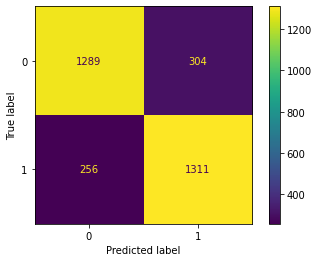

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_UNI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM

        # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional
        self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits

'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_balanced.append(('LSTM-UNI',iter,'RAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-UNI','RAdam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#BI - Directional

Adam

dataset_b.shape: 15800 768
Iteration: 1000. Loss: 0.6258319020271301. Accuracy: 75.53797% F1: 74.73% cohen_kappa: 0.5105
Iteration: 2000. Loss: 0.7429178953170776. Accuracy: 75.53797% F1: 78.58% cohen_kappa: 0.5119
Iteration: 3000. Loss: 0.5993318557739258. Accuracy: 77.50000% F1: 79.81% cohen_kappa: 0.5509
Iteration: 4000. Loss: 0.404196560382843. Accuracy: 79.43038% F1: 78.90% cohen_kappa: 0.5885
Iteration: 5000. Loss: 0.4208909869194031. Accuracy: 79.81013% F1: 77.54% cohen_kappa: 0.5956
Iteration: 6000. Loss: 0.41468143463134766. Accuracy: 81.55063% F1: 80.98% cohen_kappa: 0.6309
Iteration: 7000. Loss: 0.32730650901794434. Accuracy: 84.01899% F1: 83.71% cohen_kappa: 0.6803
Iteration: 8000. Loss: 0.31618136167526245. Accuracy: 82.62658% F1: 83.19% cohen_kappa: 0.6527
Uncertainity: 0.6896657


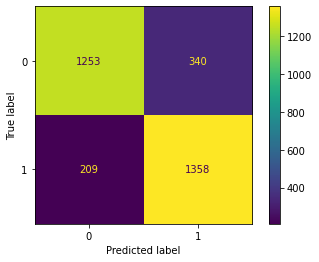

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                        batch_size=batch_size,
                                        shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                        batch_size=batch_size,
                                        shuffle=False,drop_last=True)



class LSTM_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(LSTM_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.dropout = nn.Dropout(.1)
      self.softmax = nn.Softmax(dim=1)


  def forward(self, x):
      # set initial hidden and cell states
      # print('x size:',x.size(0))
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
      c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional


      #Forward Propagation
      out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits


'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):

      # print('before:',images.shape)

      images = images.reshape(batch_size, sequence_length, input_size).to(device)

      # print('after:',images.shape)

      labels = labels.to(device)

      # Clear gradients w.r.t. parameters
      optimizer.zero_grad()

      # Forward pass to get output/logits
      outputs = model(images.float())


      # Calculate Loss: softmax --> cross entropy loss
      loss = criterion(outputs, labels)

      # Getting gradients w.r.t. parameters
      loss.backward()

      # Updating parameters
      optimizer.step()

      iter += 1
      if iter % check_acc_iter == 0:
          # Calculate Accuracy
          correct = 0
          total = 0
          y_pred = []
          y_true = []
          pos_probs = []
          neg_probs = []
          # Iterate through test dataset
          for i_model, (images, labels) in enumerate(test_loader):

              images = images.reshape(batch_size, sequence_length, input_size).to(device)

              # Forward pass only to get logits/output
              outputs = model(images.float())

              np_output = outputs.detach().cpu().numpy()

              if i_model == 0:
                  predictions = np_output
              else:
                  predictions = np.vstack((predictions, np_output))

              pos_probs.extend(outputs[:,0].tolist())
              neg_probs.extend(outputs[:,1].tolist())

              # Get predictions from the maximum value
              _, predicted = torch.max(outputs, 1)

              # Total number of labels
              total += labels.size(0)

              y_pred.extend(predicted.tolist())
              y_true.extend(labels.tolist())


              # Total correct predictions
              if torch.cuda.is_available():
                  correct += (predicted.cpu() == labels.cpu()).sum()
              else:
                  correct += (predicted == labels).sum()

          accuracy = 100 * correct.item() / total
          f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
          cohen_kappa = cohen_kappa_score(y_true, y_pred)

          if mx_acc < accuracy:
            mx_acc = accuracy
            y_score_pos = pos_probs
            y_score_neg = neg_probs

          # Print Loss
          print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
          plt_data_balanced.append(('LSTM-BI',iter,'Adam',loss.item()))


pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-BI','Adam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 15800 768
Iteration: 1000. Loss: 0.711044430732727. Accuracy: 75.53797% F1: 76.03% cohen_kappa: 0.5110
Iteration: 2000. Loss: 0.6825879812240601. Accuracy: 76.83544% F1: 76.76% cohen_kappa: 0.5367
Iteration: 3000. Loss: 0.627712607383728. Accuracy: 78.60759% F1: 79.96% cohen_kappa: 0.5727
Iteration: 4000. Loss: 0.7468099594116211. Accuracy: 79.77848% F1: 81.42% cohen_kappa: 0.5962
Iteration: 5000. Loss: 0.42553025484085083. Accuracy: 79.87342% F1: 78.34% cohen_kappa: 0.5970
Iteration: 6000. Loss: 0.4374484121799469. Accuracy: 83.25949% F1: 84.01% cohen_kappa: 0.6655
Iteration: 7000. Loss: 0.3166913092136383. Accuracy: 83.51266% F1: 83.93% cohen_kappa: 0.6704
Iteration: 8000. Loss: 0.3761945068836212. Accuracy: 83.63924% F1: 83.34% cohen_kappa: 0.6727
Uncertainity: 0.6927341


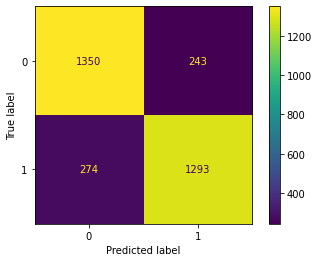

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)



class LSTM_BI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_BI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
        # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

        self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits


'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_balanced.append(('LSTM-BI',iter,'NAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-BI','NAdam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15800 768
Iteration: 1000. Loss: 0.5963817834854126. Accuracy: 72.81646% F1: 75.84% cohen_kappa: 0.4575
Iteration: 2000. Loss: 0.4408189654350281. Accuracy: 75.72785% F1: 77.22% cohen_kappa: 0.5151
Iteration: 3000. Loss: 0.523108184337616. Accuracy: 76.86709% F1: 77.72% cohen_kappa: 0.5377
Iteration: 4000. Loss: 0.49146872758865356. Accuracy: 78.06962% F1: 79.60% cohen_kappa: 0.5620
Iteration: 5000. Loss: 0.45473265647888184. Accuracy: 80.28481% F1: 80.09% cohen_kappa: 0.6057
Iteration: 6000. Loss: 0.39618879556655884. Accuracy: 81.04430% F1: 79.99% cohen_kappa: 0.6206
Iteration: 7000. Loss: 0.4063621163368225. Accuracy: 81.51899% F1: 81.44% cohen_kappa: 0.6304
Iteration: 8000. Loss: 0.3529066741466522. Accuracy: 81.96203% F1: 81.26% cohen_kappa: 0.6390
Uncertainity: 0.69071436


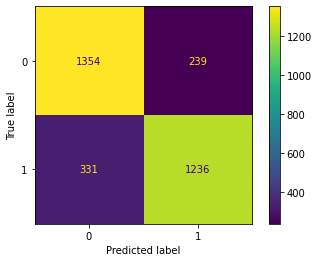

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)



class LSTM_BI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_BI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
        # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

        self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits


'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_balanced.append(('LSTM-BI',iter,'RAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_balanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-BI','RAdam'))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#Imbalanced Dataset

#UNI - Directional

Adam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 0.5010122060775757. Accuracy: 73.98119% F1: 70.75% cohen_kappa: 0.4767
Iteration: 2000. Loss: 0.5399246215820312. Accuracy: 77.02194% F1: 77.45% cohen_kappa: 0.5414
Iteration: 3000. Loss: 0.5247681736946106. Accuracy: 77.86834% F1: 76.94% cohen_kappa: 0.5567
Iteration: 4000. Loss: 0.4523363709449768. Accuracy: 78.77743% F1: 80.04% cohen_kappa: 0.5775
Iteration: 5000. Loss: 0.7745597958564758. Accuracy: 80.72100% F1: 81.11% cohen_kappa: 0.6152
Iteration: 6000. Loss: 0.45335063338279724. Accuracy: 82.88401% F1: 82.70% cohen_kappa: 0.6578
Iteration: 7000. Loss: 0.3193766176700592. Accuracy: 83.94984% F1: 83.53% cohen_kappa: 0.6788
Iteration: 8000. Loss: 0.3136636018753052. Accuracy: 82.53918% F1: 81.23% cohen_kappa: 0.6496
Uncertainity: 0.6868621


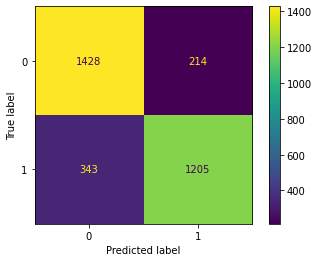

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_UNI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM

        # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional
        self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits

'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs


            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_imbalanced.append(('LSTM-UNI',iter,'Adam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-UNI','Adam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 0.5338147282600403. Accuracy: 72.41379% F1: 67.19% cohen_kappa: 0.4435
Iteration: 2000. Loss: 0.6176776885986328. Accuracy: 76.42633% F1: 77.29% cohen_kappa: 0.5300
Iteration: 3000. Loss: 0.4238751530647278. Accuracy: 78.36991% F1: 79.67% cohen_kappa: 0.5694
Iteration: 4000. Loss: 0.5285546183586121. Accuracy: 79.05956% F1: 79.36% cohen_kappa: 0.5819
Iteration: 5000. Loss: 0.5302889943122864. Accuracy: 77.52351% F1: 80.01% cohen_kappa: 0.5541
Iteration: 6000. Loss: 0.4137609899044037. Accuracy: 81.63009% F1: 81.74% cohen_kappa: 0.6331
Iteration: 7000. Loss: 0.3398224115371704. Accuracy: 82.66458% F1: 83.37% cohen_kappa: 0.6545
Iteration: 8000. Loss: 0.5339266061782837. Accuracy: 84.23197% F1: 83.62% cohen_kappa: 0.6842
Uncertainity: 0.69192755


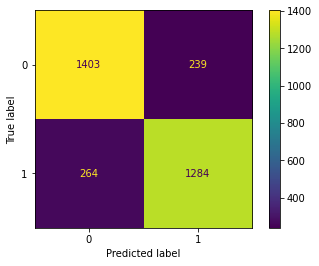

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_UNI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM

        # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional
        self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits

'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_imbalanced.append(('LSTM-UNI',iter,'NAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-UNI','NAdam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 0.3762297034263611. Accuracy: 73.38558% F1: 75.83% cohen_kappa: 0.4713
Iteration: 2000. Loss: 0.6166912317276001. Accuracy: 75.95611% F1: 74.84% cohen_kappa: 0.5183
Iteration: 3000. Loss: 0.686963677406311. Accuracy: 77.21003% F1: 77.26% cohen_kappa: 0.5447
Iteration: 4000. Loss: 0.40745916962623596. Accuracy: 78.08777% F1: 78.27% cohen_kappa: 0.5624
Iteration: 5000. Loss: 0.3658654987812042. Accuracy: 80.31348% F1: 79.45% cohen_kappa: 0.6056
Iteration: 6000. Loss: 0.456787109375. Accuracy: 79.34169% F1: 80.14% cohen_kappa: 0.5882
Iteration: 7000. Loss: 0.5108070969581604. Accuracy: 81.91223% F1: 81.32% cohen_kappa: 0.6379
Iteration: 8000. Loss: 0.3252650499343872. Accuracy: 82.63323% F1: 82.24% cohen_kappa: 0.6525
Uncertainity: 0.69313073


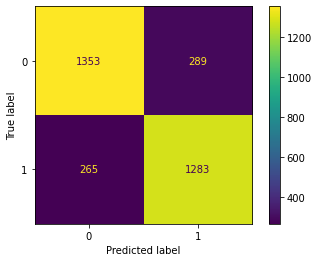

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_UNI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM

        # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional
        self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits

'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0

            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_imbalanced.append(('LSTM-UNI',iter,'RAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-UNI','RAdam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#BI - Directional

Adam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 0.5812984704971313. Accuracy: 74.04389% F1: 75.70% cohen_kappa: 0.4834
Iteration: 2000. Loss: 0.42690959572792053. Accuracy: 76.64577% F1: 76.84% cohen_kappa: 0.5336
Iteration: 3000. Loss: 0.43075594305992126. Accuracy: 78.30721% F1: 76.98% cohen_kappa: 0.5650
Iteration: 4000. Loss: 0.5177822113037109. Accuracy: 80.15674% F1: 79.86% cohen_kappa: 0.6031
Iteration: 5000. Loss: 0.5003852248191833. Accuracy: 81.44201% F1: 82.22% cohen_kappa: 0.6301
Iteration: 6000. Loss: 0.4135816693305969. Accuracy: 81.22257% F1: 80.43% cohen_kappa: 0.6239
Iteration: 7000. Loss: 0.32798489928245544. Accuracy: 84.16928% F1: 83.69% cohen_kappa: 0.6831
Iteration: 8000. Loss: 0.5029265284538269. Accuracy: 84.70219% F1: 84.73% cohen_kappa: 0.6943
Uncertainity: 0.6928167


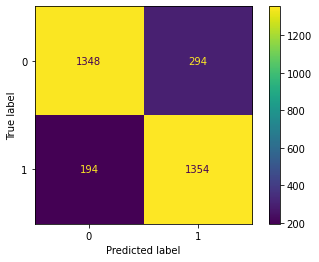

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                        batch_size=batch_size,
                                        shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                        batch_size=batch_size,
                                        shuffle=False,drop_last=True)



class LSTM_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(LSTM_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.dropout = nn.Dropout(.1)
      self.softmax = nn.Softmax(dim=1)


  def forward(self, x):
      # set initial hidden and cell states
      # print('x size:',x.size(0))
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
      c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional


      #Forward Propagation
      out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits


'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):

      # print('before:',images.shape)

      images = images.reshape(batch_size, sequence_length, input_size).to(device)

      # print('after:',images.shape)

      labels = labels.to(device)

      # Clear gradients w.r.t. parameters
      optimizer.zero_grad()

      # Forward pass to get output/logits
      outputs = model(images.float())


      # Calculate Loss: softmax --> cross entropy loss
      loss = criterion(outputs, labels)

      # Getting gradients w.r.t. parameters
      loss.backward()

      # Updating parameters
      optimizer.step()

      iter += 1
      if iter % check_acc_iter == 0:
          # Calculate Accuracy
          correct = 0
          total = 0
          y_pred = []
          y_true = []
          pos_probs = []
          neg_probs = []
          # Iterate through test dataset
          for i_model, (images, labels) in enumerate(test_loader):

              images = images.reshape(batch_size, sequence_length, input_size).to(device)

              # Forward pass only to get logits/output
              outputs = model(images.float())

              np_output = outputs.detach().cpu().numpy()

              if i_model == 0:
                  predictions = np_output
              else:
                  predictions = np.vstack((predictions, np_output))

              pos_probs.extend(outputs[:,0].tolist())
              neg_probs.extend(outputs[:,1].tolist())

              # Get predictions from the maximum value
              _, predicted = torch.max(outputs, 1)

              # Total number of labels
              total += labels.size(0)

              y_pred.extend(predicted.tolist())
              y_true.extend(labels.tolist())


              # Total correct predictions
              if torch.cuda.is_available():
                  correct += (predicted.cpu() == labels.cpu()).sum()
              else:
                  correct += (predicted == labels).sum()

          accuracy = 100 * correct.item() / total
          f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
          cohen_kappa = cohen_kappa_score(y_true, y_pred)

          if mx_acc < accuracy:
            mx_acc = accuracy
            y_score_pos = pos_probs
            y_score_neg = neg_probs

          # Print Loss
          print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
          plt_data_imbalanced.append(('LSTM-BI',iter,'Adam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-BI','Adam'))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 0.7222110629081726. Accuracy: 74.57680% F1: 74.05% cohen_kappa: 0.4914
Iteration: 2000. Loss: 0.6248669028282166. Accuracy: 76.26959% F1: 76.08% cohen_kappa: 0.5256
Iteration: 3000. Loss: 0.5380875468254089. Accuracy: 78.24451% F1: 77.23% cohen_kappa: 0.5641
Iteration: 4000. Loss: 0.7783905267715454. Accuracy: 80.53292% F1: 80.78% cohen_kappa: 0.6113
Iteration: 5000. Loss: 0.42664045095443726. Accuracy: 81.25392% F1: 81.17% cohen_kappa: 0.6253
Iteration: 6000. Loss: 0.4754221439361572. Accuracy: 81.34796% F1: 81.79% cohen_kappa: 0.6278
Iteration: 7000. Loss: 0.41150158643722534. Accuracy: 83.73041% F1: 83.64% cohen_kappa: 0.6748
Iteration: 8000. Loss: 0.5898972749710083. Accuracy: 85.17241% F1: 85.17% cohen_kappa: 0.7037
Uncertainity: 0.69261914


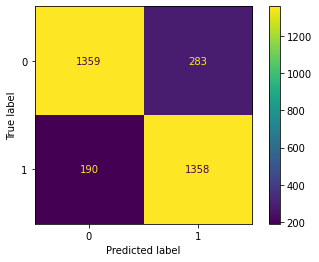

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)



class LSTM_BI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_BI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
        # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

        self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits


'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0

            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_imbalanced.append(('LSTM-BI',iter,'NAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-BI','NAdam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 0.5882283449172974. Accuracy: 73.26019% F1: 70.21% cohen_kappa: 0.4624
Iteration: 2000. Loss: 0.36604025959968567. Accuracy: 76.30094% F1: 77.41% cohen_kappa: 0.5278
Iteration: 3000. Loss: 0.5228058099746704. Accuracy: 75.36050% F1: 77.81% cohen_kappa: 0.5108
Iteration: 4000. Loss: 0.5219892263412476. Accuracy: 79.46708% F1: 79.34% cohen_kappa: 0.5896
Iteration: 5000. Loss: 0.4355847239494324. Accuracy: 78.65204% F1: 80.29% cohen_kappa: 0.5755
Iteration: 6000. Loss: 0.5221397280693054. Accuracy: 80.31348% F1: 81.64% cohen_kappa: 0.6083
Iteration: 7000. Loss: 0.3171159625053406. Accuracy: 77.14734% F1: 79.81% cohen_kappa: 0.5469
Iteration: 8000. Loss: 0.38664525747299194. Accuracy: 84.16928% F1: 83.92% cohen_kappa: 0.6834
Uncertainity: 0.6930765


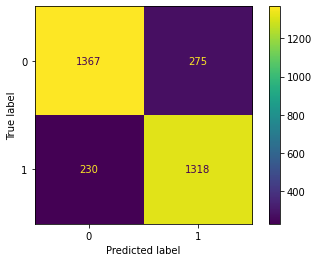

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 2
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)



class LSTM_BI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_BI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
        # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

        self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits


'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            pos_probs = []
            neg_probs = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                pos_probs.extend(outputs[:,0].tolist())
                neg_probs.extend(outputs[:,1].tolist())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1 = f1_score(y_true,y_pred, zero_division='warn') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy
              y_score_pos = pos_probs
              y_score_neg = neg_probs

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1: {:.2f}% cohen_kappa: {:.4f}'.format(iter, loss.item(), accuracy, f1, cohen_kappa))
            plt_data_imbalanced.append(('LSTM-BI',iter,'RAdam',loss.item()))

pos_fpr, pos_tpr, pos_thresholds = roc_curve(y_true, y_score_pos )
neg_fpr, neg_tpr, neg_thresholds = roc_curve(y_true, y_score_neg )

roc_auc_pos = roc_auc_score(y_true, y_score_pos )
roc_auc_neg = roc_auc_score(y_true, y_score_neg )

plt_ROC_imbalanced.append((neg_fpr,neg_tpr,roc_auc_pos,'LSTM-BI','RAdam'))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

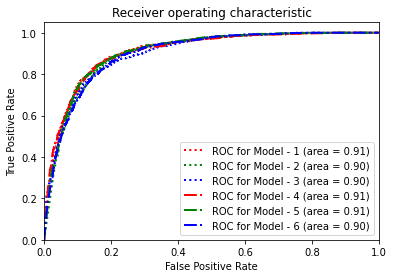

In [ ]:
# plot ROC for blanaced dataset
plt.figure()
lw = 2

colors = ['red','green','blue']

for i in range(3):
  plt.plot(
      plt_ROC_balanced[i][0],
      plt_ROC_balanced[i][1],
      color=colors[i],
      lw=lw,
      linestyle="dotted",
      label="ROC for Model - %d (area = %0.2f)" % (i+1, 1 - plt_ROC_balanced[i][2]))

for i in range(3,6):
  plt.plot(
      plt_ROC_balanced[i][0],
      plt_ROC_balanced[i][1],
      color=colors[i-3],
      lw=lw,
      linestyle="dashdot",
      label="ROC for Model - %d (area = %0.2f)" % (i+1,1 - plt_ROC_balanced[i][2]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="best")
plt.show()

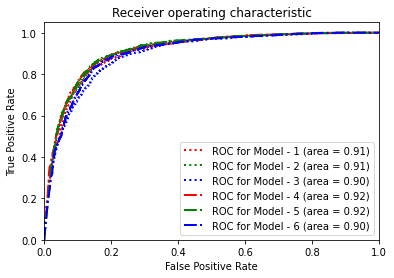

In [ ]:
# plot ROC for imblanaced dataset

plt.figure()
lw = 2
colors = ['red','green','blue']

for i in range(3):
  plt.plot(
      plt_ROC_imbalanced[i][0],
      plt_ROC_imbalanced[i][1],
      color=colors[i],
      lw=lw,
      linestyle="dotted",
      label="ROC for Model - %d (area = %0.2f)" % (i+1,1 - plt_ROC_imbalanced[i][2]))

for i in range(3,6):
  plt.plot(
      plt_ROC_imbalanced[i][0],
      plt_ROC_imbalanced[i][1],
      color=colors[i-3],
      lw=lw,
      linestyle="dashdot",
      label="ROC for Model - %d (area = %0.2f)" % (i+1,1 - plt_ROC_imbalanced[i][2]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="best")
plt.show()

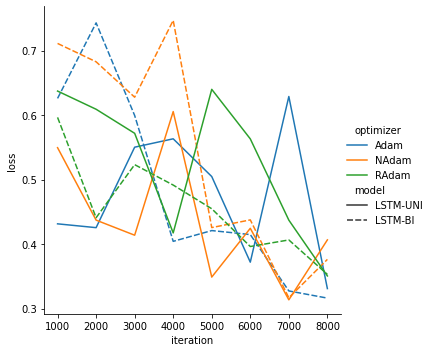

In [ ]:
plt_df = pd.DataFrame.from_records(
    plt_data_balanced, columns=['model','iteration','optimizer','loss'])
sns.relplot(x="iteration", y="loss",
            hue="optimizer", style="model",
            kind="line", data=plt_df)

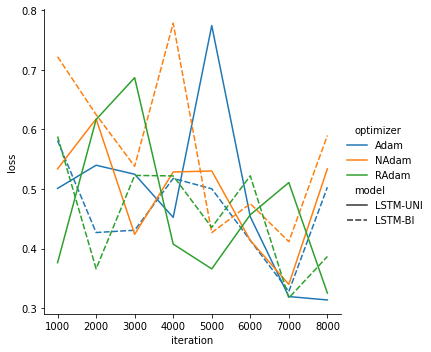

In [ ]:
plt_df = pd.DataFrame.from_records(
    plt_data_imbalanced, columns=['model','iteration','optimizer','loss'])
sns.relplot(x="iteration", y="loss",
            hue="optimizer", style="model",
            kind="line", data=plt_df)

In [ ]:
import datetime
ct = datetime.datetime.now()
print("current time:-", ct)

current time:- 2023-03-06 05:06:18.269675
